In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
from sklearn.decomposition import PCA
from astropy.table import Table, Column
import sys
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm
import pandas as pd
sys.path.insert(0, '../Modules')
import erqScaling
import erqMedSpec
import os
from statistics import random

sys.path.insert(0, '/home/reza/erq/')
# from erqml  import *
from sklearn.cluster import AgglomerativeClustering


In [3]:

# reading ...
smp=Table.read('../LumMatch/LumMatch.fits') 

iW3 = smp['i-w3']
# iW3 = 10.0**(iW3/2.5)
kt80 = smp['kurt80_gf']
rew = smp['rew_gf']
rew=np.log10(rew)
fwhm = smp['fwhm_gf'] 
fwhm=np.log10(fwhm)
N5_C4 = smp['frat_nv/civ']
rz=smp['r-z']
sdss_name=smp['sdss_name']
z_qso=smp['z_dr12']
X = np.array(list(zip(iW3, rew, kt80)))
# iW3_sc, m, s = scale(iW3)
# rew_sc, m, s = scale(rew)
# X_sc, minData, rangeData = erqScaling.MinMaxScaler(X)
X_sc, minData, rangeData = erqScaling.scale(X)


symbols = ['d', 'o', 's','x', 'v']
sizes=[10,1,7,7, 3]
# colors = plt.cm.viridis_r(X_sc[:,2])
colors = ['r', 'b', 'g', 'c','y']
# smp.columns
# print(len(colors))
# print(np.max(rz))/

5 average
224 [4.63325109 1.92755123 0.35132148]
15 [4.98836786 1.30735402 0.28299019]
10 [2.16324389 0.56209645 0.2180287 ]
28985 [2.48257264 1.55364002 0.24648162]
3 [7.48620275 1.67087237 0.2228177 ]


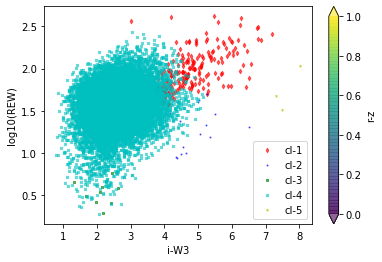

In [3]:
link='average'

for ncl in range(5,6):
    print(ncl, link)
    model = AgglomerativeClustering(n_clusters=ncl,
                                        linkage=link, affinity='euclidean').fit(X_sc)
    labels = model.labels_
    
    for i in range(ncl):
        X_plot = X[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
    plt.savefig('3d-rz-agg-l-%s-ncl-%d-cmp.pdf' %(link,ncl) , bbox_inches='tight', dpi=200)
    plt.show()

In [ ]:
# link='complete'
# from sklearn.model_selection import train_test_split
# nBoot=20
# BootLabels=np.zeros([nBoot,len(X_sc)])
# BootLabels=BootLabels-1
# ncl=5
# for b in (range(nBoot)):
#     print('Boot: ',b)
#     X_dummy, X_test = train_test_split(X_sc, test_size=0.9)
#     model = AgglomerativeClustering(n_clusters=ncl, linkage=link, 
#                                     affinity='euclidean').fit(X_test)
#     labels = model.labels_
#     for i in tqdm(range(len(X_sc))):
#         for j in range(len(X_test)):
    
#             if((X_sc[i,0]==X_test[j,0]) & (X_sc[i,1]==X_test[j,1]) & (X_sc[i,2]==X_test[j,2])):
#                 BootLabels[b,i]=labels[j]

29207 29237


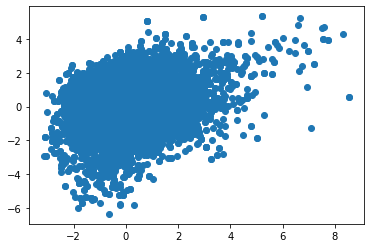

In [5]:
link='average'
from sklearn.model_selection import train_test_split
nBoot=5
BootLabels=np.zeros([nBoot,len(X_sc)])
data_range_x = np.linspace(np.min(X_sc[:,0]), np.max(X_sc[:,0]), len(X_sc))
data_range_y = np.linspace(np.min(X_sc[:,1]), np.max(X_sc[:,1]), len(X_sc))
data_range_z = np.linspace(np.min(X_sc[:,2]), np.max(X_sc[:,2]), len(X_sc))
nERQ = np.sum(((iW3>=4.6)&(rew>=2)))
BootSize=np.int32(len(X_sc)*0.999)
rand_ind = np.random.choice(range(len(X_sc)), BootSize)
X_test= X_sc[rand_ind,:]
plt.scatter(X_test[:,0], X_test[:,1])
print(BootSize, len(X_sc))

  0%|          | 0/5 [00:00<?, ?it/s]

Boot:  0
29201 [-0.10130869  0.004641   -0.05356546]
2 [ 8.5171966   0.58069194 -0.47278213]
1 [2.94236700e+00 5.28275775e+00 3.06389303e-03]
1 [7.06421158 1.68477284 2.14790299]
2 [6.14651755 1.20472002 0.16175391]


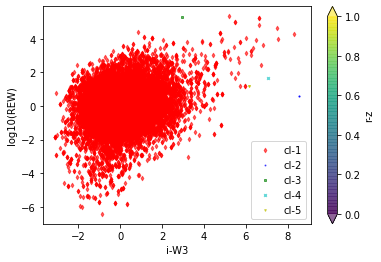

 20%|██        | 1/5 [00:07<00:31,  7.92s/it]

Boot:  1
29201 [-0.10661005  0.00086958 -0.04282337]
2 [ 7.08001686 -1.24939231  2.15010625]
2 [ 8.67538773  0.17412058 -0.7170147 ]
1 [9.778495   2.38550116 2.14943239]
1 [-0.65621867 -6.35527563 -0.78528322]


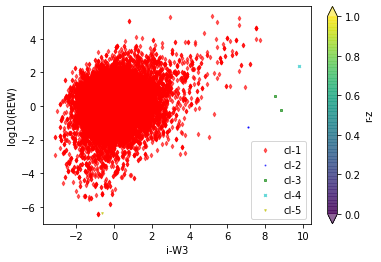

 40%|████      | 2/5 [00:15<00:23,  7.93s/it]

Boot:  2
29201 [-0.11883095  0.00348546 -0.04538549]
2 [ 8.67538773  0.17412058 -0.7170147 ]
2 [9.778495   2.38550116 2.14943239]
1 [ 3.49825601 -2.86783142 -0.04087894]
1 [8.30757997 4.29281173 2.12144831]


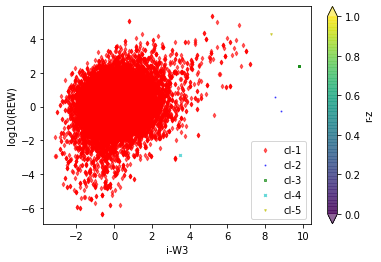

 60%|██████    | 3/5 [00:24<00:16,  8.01s/it]

Boot:  3
29201 [-9.84270118e-02  5.12179044e-05 -4.42323614e-02]
2 [ 7.08001686 -1.24939231  2.15010625]
1 [9.778495   2.38550116 2.14943239]
1 [ 8.83357886 -0.23245077 -0.96124727]
2 [2.94236700e+00 5.28275775e+00 3.06389303e-03]


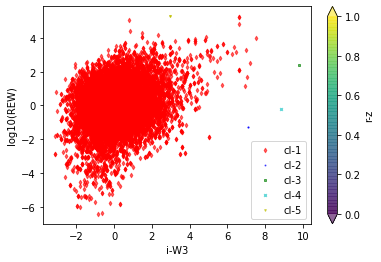

 80%|████████  | 4/5 [00:32<00:08,  8.17s/it]

Boot:  4
29197 [-0.10982077 -0.00399924 -0.04392484]
5 [ 8.83357886 -0.23245077 -0.96124727]
1 [2.94236700e+00 5.28275775e+00 3.06389303e-03]
2 [ 6.73987198  2.41983003 -0.68361465]
2 [0.80542148 5.04270499 0.87206905]


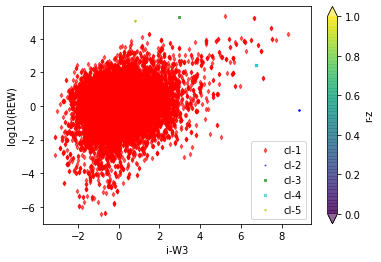

100%|██████████| 5/5 [00:40<00:00,  8.15s/it]


In [12]:
ncl=5
for b in tqdm(range(nBoot)):
    X_test=X_sc
    print('Boot: ',b)
    rand_ind = np.random.choice(range(len(X_sc)), BootSize)
    X_test= X_sc[rand_ind,:]
#     for r in range(BootSize):
#         X_test[rand_ind[r],0] = np.random.choice(data_range_x)
#         X_test[rand_ind[r],1] = np.random.choice(data_range_y)
#         X_test[rand_ind[r],2] = np.random.choice(data_range_z)
    model = AgglomerativeClustering(n_clusters=ncl, linkage=link, 
                                    affinity='euclidean').fit(X_test)
    labels = model.labels_
    for i in range(ncl):
        
        X_plot = X_test[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
#     plt.savefig('3d-agg-l-%s-ncl-%d-avg.pdf' %(link,ncl) , bbox_inches='tight', dpi=200)
    plt.show()
#     BootLabels[b,rand_ind]=labels
#     BootLabels[b,~rand_ind]=np.int32((b+1)*100)

  0%|          | 0/5 [00:00<?, ?it/s]

Boot:  0
17484 [-0.20573172 -0.32001592  0.39862242]
83 [5.77372584 3.03018288 1.89759012]
2997 [0.60784503 1.35377995 0.08173146]
6717 [-0.32135667  0.46605023 -1.05403086]
1926 [ 1.60143273  0.14660105 -0.72600447]


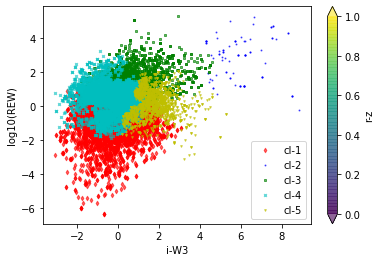

 20%|██        | 1/5 [00:47<03:09, 47.33s/it]

Boot:  1
5943 [-0.48439187 -0.9482387   0.18140138]
19784 [-0.19135165  0.21954894 -0.20062663]
55 [5.77372584 3.00259062 1.94488943]
2959 [1.14780911 0.11058318 0.43513303]
466 [2.3372266  1.45821775 0.71493202]


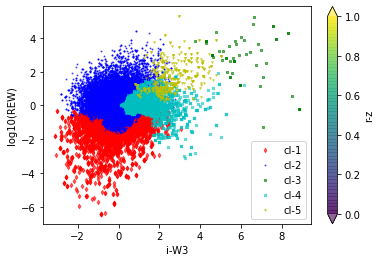

 40%|████      | 2/5 [01:29<02:17, 45.90s/it]

Boot:  2
51 [6.33046124 3.03018288 1.45002572]
25720 [-0.15956433  0.0189629  -0.13274533]
1193 [-0.92877228 -1.92192724  0.63112581]
1809 [1.65954347 0.14907204 1.22479145]
434 [2.34831355 2.29189998 0.78738644]


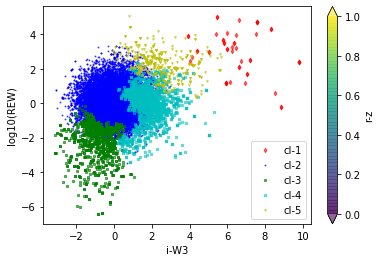

 60%|██████    | 3/5 [02:22<01:35, 47.77s/it]

Boot:  3
66 [5.89537693 2.81121612 1.91494199]
1782 [1.87650006 1.03409719 0.52299699]
26046 [-0.19284741 -0.00513566 -0.12751689]
1119 [ 0.9719504  -1.73064309  1.80684765]
194 [-1.28829672 -3.80345258  2.14983757]


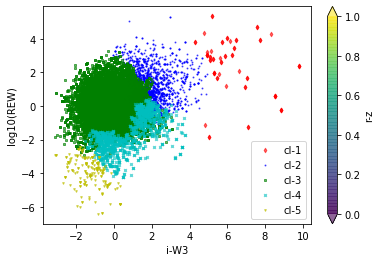

 80%|████████  | 4/5 [03:06<00:46, 46.74s/it]

Boot:  4
167 [4.15045224 2.34338994 1.90127568]
8990 [ 0.27469872 -0.41346298  0.31014088]
636 [-0.58890993 -2.98548888  2.15008978]
17092 [-0.44156994  0.22052478 -0.42845717]
2322 [ 1.330314    1.0982902  -0.17048435]


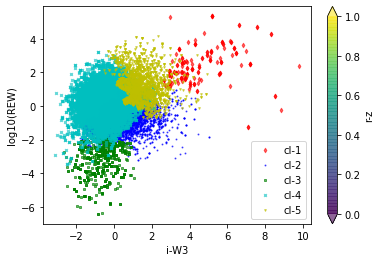

100%|██████████| 5/5 [03:49<00:00, 45.98s/it]


In [7]:
ncl=5
link='complete'
for b in tqdm(range(nBoot)):
    X_test=X_sc
    print('Boot: ',b)
    rand_ind = np.random.choice(range(len(X_sc)), BootSize)
    X_test= X_sc[rand_ind,:]
#     for r in range(BootSize):
#         X_test[rand_ind[r],0] = np.random.choice(data_range_x)
#         X_test[rand_ind[r],1] = np.random.choice(data_range_y)
#         X_test[rand_ind[r],2] = np.random.choice(data_range_z)
    model = AgglomerativeClustering(n_clusters=ncl, linkage=link, 
                                    affinity='euclidean').fit(X_test)
    labels = model.labels_
    for i in range(ncl):
        
        X_plot = X_test[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
#     plt.savefig('3d-agg-l-%s-ncl-%d-avg.pdf' %(link,ncl) , bbox_inches='tight', dpi=200)
    plt.show()
#     BootLabels[b,rand_ind]=labels
#     BootLabels[b,~rand_ind]=np.int32((b+1)*100)

  0%|          | 0/5 [00:00<?, ?it/s]

Boot:  0
29201 [-0.12238775 -0.00586867 -0.05053153]
2 [ 8.67538773  0.17412058 -0.7170147 ]
1 [ 7.08001686 -1.24939231  2.15010625]
2 [2.94236700e+00 5.28275775e+00 3.06389303e-03]
1 [ 5.28392508 -0.49955046 -1.45428721]


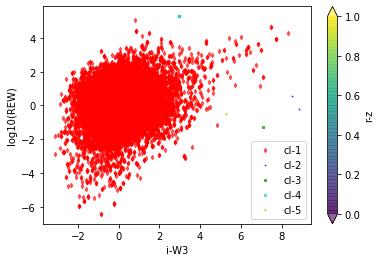

 20%|██        | 1/5 [00:05<00:21,  5.41s/it]

Boot:  1
29198 [-0.10537633 -0.00502001 -0.03582981]
2 [9.778495   2.38550116 2.14943239]
3 [ 8.5171966   0.58069194 -0.47278213]
2 [ 7.08001686 -1.24939231  2.15010625]
2 [2.94236700e+00 5.28275775e+00 3.06389303e-03]


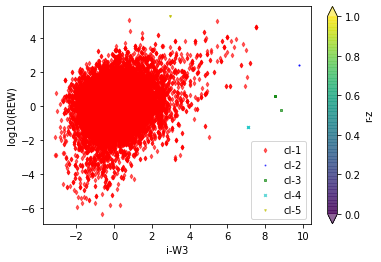

 40%|████      | 2/5 [00:10<00:16,  5.41s/it]

Boot:  2
29202 [-0.10323125  0.00497729 -0.04720337]
1 [2.94236700e+00 5.28275775e+00 3.06389303e-03]
2 [9.778495   2.38550116 2.14943239]
1 [ 8.5171966   0.58069194 -0.47278213]
1 [0.80542148 5.04270499 0.87206905]


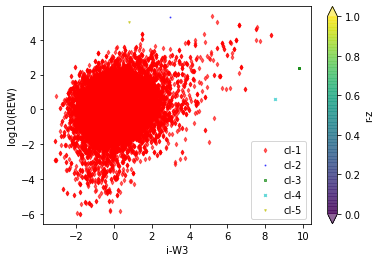

 60%|██████    | 3/5 [00:16<00:10,  5.41s/it]

Boot:  3
29199 [-0.11014258 -0.00546543 -0.04720337]
2 [ 8.67538773  0.17412058 -0.7170147 ]
2 [9.778495   2.38550116 2.14943239]
1 [ 7.08001686 -1.24939231  2.15010625]
3 [ 3.49825601 -2.86783142 -0.04087894]


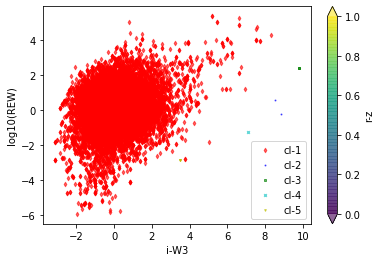

 80%|████████  | 4/5 [00:21<00:05,  5.41s/it]

Boot:  4
29199 [-0.11160944  0.004641   -0.05586988]
3 [ 8.83357886 -0.23245077 -0.96124727]
1 [ 3.49825601 -2.86783142 -0.04087894]
1 [2.94236700e+00 5.28275775e+00 3.06389303e-03]
3 [ 6.73987198  2.41983003 -0.68361465]


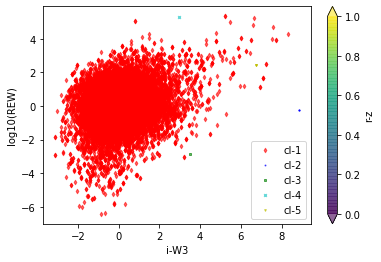

100%|██████████| 5/5 [00:27<00:00,  5.41s/it]


In [8]:
ncl=5
link='single'
for b in tqdm(range(nBoot)):
    X_test=X_sc
    print('Boot: ',b)
    rand_ind = np.random.choice(range(len(X_sc)), BootSize)
    X_test= X_sc[rand_ind,:]
#     for r in range(BootSize):
#         X_test[rand_ind[r],0] = np.random.choice(data_range_x)
#         X_test[rand_ind[r],1] = np.random.choice(data_range_y)
#         X_test[rand_ind[r],2] = np.random.choice(data_range_z)
    model = AgglomerativeClustering(n_clusters=ncl, linkage=link, 
                                    affinity='euclidean').fit(X_test)
    labels = model.labels_
    for i in range(ncl):
        
        X_plot = X_test[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
#     plt.savefig('3d-agg-l-%s-ncl-%d-avg.pdf' %(link,ncl) , bbox_inches='tight', dpi=200)
    plt.show()
#     BootLabels[b,rand_ind]=labels
#     BootLabels[b,~rand_ind]=np.int32((b+1)*100)

In [ ]:
for b in tqdm(range(nBoot)):
    labels = BootLabels[b,:]
    for i in range(ncl):
        X_plot = X[labels==i]
        print(len(X_plot), np.median(X_plot,axis=0))
        symbols_plot = symbols[i]
        colors_plot = colors[i]
        size_plot=sizes[i]
        p=plt.scatter(X_plot[:,0], X_plot[:,1],   
                    marker=symbols_plot, facecolor=colors_plot, 
                      alpha=0.6, s=size_plot, label='cl-%d'%(i+1))
    plt.colorbar(p, extend='both', label='r-z')
    plt.xlabel('i-W3')
    plt.ylabel('log10(REW)')
    plt.legend()
#     plt.savefig('3d-agg-l-%s-ncl-%d-avg.pdf' %(link,ncl) , bbox_inches='tight', dpi=200)
    plt.show()

In [ ]:
Labels_with_CI=np.zeros([len(X_sc),2])
for i in range(len(X_sc)):
    L = np.int32(BootLabels[:,i])
    M = np.unique(L, return_counts=True)
    ind_mod =np.where(M[1]==np.max(M[1]))
    Mod = M[0][ind_mod[0][0]]
    CI_Mod = np.max(M[1])/nBoot
    Labels_with_CI[i,0]=Mod
    Labels_with_CI[i,1]=CI_Mod
    
np.savetxt('random-#1-Labels_with_CI.dat', Labels_with_CI)
np.savetxt('random-#1-BootLabels.dat', BootLabels, fmt='%d')

In [ ]:
label0= Labels_with_CI[:,0]==4
# np.median(Labels_with_CI[label0,1])
plt.hist(Labels_with_CI[label0,1])

In [ ]:
plt.scatter(Labels_with_CI[:,0],Labels_with_CI[:,1])

In [ ]:
from sklearn import metrics
metrics.silhouette_score(X_test, labels, metric='euclidean')

In [ ]:
metrics.calinski_harabasz_score(X_test, labels)

In [ ]:
metrics.davies_bouldin_score(X_test, labels)

In [ ]:
a=[1,2,3,4,5,6,7,8,9]

np.random.choice(a, 3)

In [ ]:
rand_ind = np.random.choices(range(len(X_sc)), k=int(len(X_sc)*0.1))


In [ ]:
c=np.array([1,2,3,4,5,6,7])
bb=[1,2]
# c==bb

In [ ]:
int(len(X_sc)*0.1)


In [ ]:
c[[2,3,5]]

In [ ]:
BootSize/5